In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dfc = pd.read_csv('calendar.csv')
dfl = pd.read_csv('listings.csv')
dfr = pd.read_csv('reviews.csv')

In [6]:
dfc.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
# ubah format data
dfc['date'] = pd.to_datetime(dfc['date'], format='%Y-%m-%d')
# Tambahkan kolom bulan dan tahun
dfc['bulan'] = dfc['date'].dt.month
dfc['tahun'] = dfc['date'].dt.year

In [8]:
dfc.head()

,listing_id,date,available,price,bulan,tahun
0,241032,2016-01-04,t,$85.00,1,2016
1,241032,2016-01-05,t,$85.00,1,2016
2,241032,2016-01-06,f,NaN,1,2016
3,241032,2016-01-07,f,NaN,1,2016
4,241032,2016-01-08,f,NaN,1,2016


In [9]:
dfc['bulan'] = dfc['date'].dt.strftime('%B')  # '%B' menghasilkan nama bulan dalam teks

In [10]:
dfc.head()

,listing_id,date,available,price,bulan,tahun
0,241032,2016-01-04,t,$85.00,January,2016
1,241032,2016-01-05,t,$85.00,January,2016
2,241032,2016-01-06,f,NaN,January,2016
3,241032,2016-01-07,f,NaN,January,2016
4,241032,2016-01-08,f,NaN,January,2016


In [11]:
dfc['price'] = dfc['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [12]:
dfc = dfc.rename({'price': 'payment'}, axis=1)

In [13]:
dfc.head()

,listing_id,date,available,payment,bulan,tahun
0,241032,2016-01-04,t,85.0,January,2016
1,241032,2016-01-05,t,85.0,January,2016
2,241032,2016-01-06,f,NaN,January,2016
3,241032,2016-01-07,f,NaN,January,2016
4,241032,2016-01-08,f,NaN,January,2016


In [14]:
# buang null
dfc_cleaned = dfc.dropna()

In [15]:
# Hitung median price per bulan untuk tiap id, dan jumlah id di setiap bulan-tahun
dfcg = dfc_cleaned.groupby(['listing_id', 'tahun', 'bulan']).agg(
    median_price=('payment', 'median'),
    jumlah_id=('listing_id', 'size')
).reset_index()

In [16]:
dfcg

,listing_id,tahun,bulan,median_price,jumlah_id
0,3335,2016,April,120.0,30
1,3335,2016,August,120.0,31
2,3335,2016,December,120.0,31
3,3335,2016,February,120.0,1
4,3335,2016,July,120.0,31
...,...,...,...,...,...
36110,10340165,2016,May,43.0,31
36111,10340165,2016,November,43.0,30
36112,10340165,2016,October,43.0,31
36113,10340165,2016,September,43.0,30


In [17]:
# Gabungkan kolom 'bulan' dan 'tahun' menjadi satu kolom 'tahun_bulan'
dfcg['tahun_bulan'] = dfcg['bulan'] + ' ' + dfcg['tahun'].astype(str)

In [18]:
dfcg

,listing_id,tahun,bulan,median_price,jumlah_id,tahun_bulan
0,3335,2016,April,120.0,30,April 2016
1,3335,2016,August,120.0,31,August 2016
2,3335,2016,December,120.0,31,December 2016
3,3335,2016,February,120.0,1,February 2016
4,3335,2016,July,120.0,31,July 2016
...,...,...,...,...,...,...
36110,10340165,2016,May,43.0,31,May 2016
36111,10340165,2016,November,43.0,30,November 2016
36112,10340165,2016,October,43.0,31,October 2016
36113,10340165,2016,September,43.0,30,September 2016


In [19]:
# di sort perbulan
dfcg = dfcg.sort_values(by=['listing_id','bulan', 'tahun'])
dfcg

,listing_id,tahun,bulan,median_price,jumlah_id,tahun_bulan
0,3335,2016,April,120.0,30,April 2016
1,3335,2016,August,120.0,31,August 2016
2,3335,2016,December,120.0,31,December 2016
3,3335,2016,February,120.0,1,February 2016
11,3335,2017,January,120.0,2,January 2017
...,...,...,...,...,...,...
36109,10340165,2016,March,43.0,31,March 2016
36110,10340165,2016,May,43.0,31,May 2016
36111,10340165,2016,November,43.0,30,November 2016
36112,10340165,2016,October,43.0,31,October 2016


In [20]:
# Membuat dictionary untuk memetakan nama bulan ke angka
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

In [21]:
# Menambahkan kolom bulan numerik
dfcg['bulan_num'] = dfcg['bulan'].map(month_mapping)

In [22]:
df1 = dfcg.sort_values(by=['listing_id','tahun', 'bulan_num'])
df1.head()

,listing_id,tahun,bulan,median_price,jumlah_id,tahun_bulan,bulan_num
3,3335,2016,February,120.0,1,February 2016,2
6,3335,2016,March,120.0,31,March 2016,3
0,3335,2016,April,120.0,30,April 2016,4
7,3335,2016,May,120.0,31,May 2016,5
5,3335,2016,June,120.0,30,June 2016,6


In [23]:
df1 = df1[['listing_id','tahun','bulan','bulan_num','median_price','jumlah_id']]

In [24]:
df1.head()

,listing_id,tahun,bulan,bulan_num,median_price,jumlah_id
3,3335,2016,February,2,120.0,1
6,3335,2016,March,3,120.0,31
0,3335,2016,April,4,120.0,30
7,3335,2016,May,5,120.0,31
5,3335,2016,June,6,120.0,30


In [25]:
#rename id jadi listing_id
dfl = dfl.rename({'id': 'listing_id'}, axis=1)

#ambil kolom yang diperlukan
dfl2 = dfl[['listing_id','name','host_id','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_identity_verified','zipcode','latitude','longitude','is_location_exact','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','price','weekly_price','monthly_price','guests_included','minimum_nights','maximum_nights','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification']]

In [26]:
# Mengubah data yang bertipe string ke float
dfl2['price'] = dfl2['price'].str.replace('$', '').str.replace(',', '').astype(float)
dfl2['weekly_price'] = dfl2['weekly_price'].str.replace('$', '').str.replace(',', '').astype(float)
dfl2['monthly_price'] = dfl2['monthly_price'].str.replace('$', '').str.replace(',', '').astype(float)
dfl2['host_response_rate'] = dfl2['host_response_rate'].str.replace('%', '').astype(float)
dfl2['host_acceptance_rate'] = dfl2['host_acceptance_rate'].str.replace('%', '').astype(float)

# Mengubah data yang beripe integer ke string
dfl2['host_id'] = dfl2['host_id'].astype(str)
dfl2['latitude'] = dfl2['latitude'].astype(str)
dfl2['longitude'] = dfl2['longitude'].astype(str)

C:\Users\User\AppData\Local\Temp\ipykernel_19788\2586953589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfl2['price'] = dfl2['price'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_19788\2586953589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfl2['weekly_price'] = dfl2['weekly_price'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_19788\2586953589.py:4: SettingWithCopyWarning: 
A value is 

In [27]:
dfl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3818 non-null   int64  
 1   name                              3818 non-null   object 
 2   host_id                           3818 non-null   object 
 3   host_response_time                3295 non-null   object 
 4   host_response_rate                3295 non-null   float64
 5   host_acceptance_rate              3045 non-null   float64
 6   host_is_superhost                 3816 non-null   object 
 7   host_identity_verified            3816 non-null   object 
 8   zipcode                           3811 non-null   object 
 9   latitude                          3818 non-null   object 
 10  longitude                         3818 non-null   object 
 11  is_location_exact                 3818 non-null   object 
 12  proper

In [28]:
dfcg2 = dfcg [['listing_id', 'jumlah_id']]

In [29]:
dfcg2

,listing_id,jumlah_id
0,3335,30
1,3335,31
2,3335,31
3,3335,1
11,3335,2
...,...,...
36109,10340165,31
36110,10340165,31
36111,10340165,30
36112,10340165,31


In [30]:
dfcg3 = dfcg2.groupby(['listing_id']).agg(jumlah_id=('jumlah_id', 'sum')).reset_index()

In [32]:
dfcg3

,listing_id,jumlah_id
0,3335,309
1,4291,365
2,5682,309
3,6606,365
4,7369,53
...,...,...
3718,10331249,354
3719,10332096,365
3720,10334184,361
3721,10339145,365


In [34]:
# Menggabungkan dfcg3 dan dfl2 berdasarkan 'listing_id dengan tujuan memembuat kolom jumlah_id di dataset listing
dfl3 = pd.merge(dfcg3, dfl2, on='listing_id', how='left')
dfl3.head()

,listing_id,jumlah_id,name,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,zipcode,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,3335,309,Sweet Seattle Urban Homestead 2 Bdr,4193,within a few hours,88.0,100.0,f,t,98118,...,NaN,NaN,NaN,NaN,NaN,NaN,f,strict,f,f
1,4291,365,Sunrise in Seattle Master Suite,35749,within a day,100.0,100.0,f,t,98115,...,10.0,9.0,10.0,9.0,9.0,9.0,f,moderate,f,f
2,5682,309,"Cozy Studio, min. to downtown -WiFi",8993,within an hour,100.0,100.0,f,t,98106,...,10.0,10.0,10.0,10.0,9.0,10.0,t,strict,f,t
3,6606,365,"Fab, private seattle urban cottage!",14942,within a few hours,90.0,100.0,f,t,98103,...,9.0,9.0,10.0,9.0,10.0,9.0,f,strict,f,f
4,7369,53,launchingpad/landingpad,19425,NaN,NaN,NaN,f,f,98122,...,10.0,10.0,10.0,10.0,10.0,9.0,f,flexible,f,f


In [35]:
df2 = dfl3

In [36]:
#df1 = data calendar final
#df2 = data listing final

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36115 entries, 3 to 36114
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   listing_id    36115 non-null  int64  
 1   tahun         36115 non-null  int32  
 2   bulan         36115 non-null  object 
 3   bulan_num     36115 non-null  int64  
 4   median_price  36115 non-null  float64
 5   jumlah_id     36115 non-null  int64  
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 1.8+ MB


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3723 non-null   int64  
 1   jumlah_id                         3723 non-null   int64  
 2   name                              3723 non-null   object 
 3   host_id                           3723 non-null   object 
 4   host_response_time                3243 non-null   object 
 5   host_response_rate                3243 non-null   float64
 6   host_acceptance_rate              3000 non-null   float64
 7   host_is_superhost                 3721 non-null   object 
 8   host_identity_verified            3721 non-null   object 
 9   zipcode                           3716 non-null   object 
 10  latitude                          3723 non-null   object 
 11  longitude                         3723 non-null   object 
 12  is_loc

In [39]:
#hanya untuk eda kita hapus kolom id di kedua dataframe
df1_without_id = df1.drop(columns=['listing_id'])
df2_without_id = df2.drop(columns=['listing_id'])

In [40]:
# Mengambil kolom numerik dari df1_without_id
nums1 = df1_without_id.select_dtypes(include=['float64', 'int32', 'int64'])

# Mengambil kolom kategorikal dari df2_without_id
cats2 = df2_without_id.select_dtypes(include=['object'])

# Mengambil kolom numerik dari df2_without_id
nums2 = df2_without_id.select_dtypes(include=['float64', 'int64'])

In [41]:
# Mencetak judul kolom dari DataFrame nums1
print("\nKolom numerik (nums1):")
print(nums1.columns.tolist())

# Mencetak judul kolom dari DataFrame cats2
print("Kolom kategorikal (cats2):")
print(cats2.columns.tolist())

# Mencetak judul kolom dari DataFrame nums2
print("Kolom kategorikal (nums2):")
print(nums2.columns.tolist())


Kolom numerik (nums1):
['tahun', 'bulan_num', 'median_price', 'jumlah_id']
Kolom kategorikal (cats2):
['name', 'host_id', 'host_response_time', 'host_is_superhost', 'host_identity_verified', 'zipcode', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']
Kolom kategorikal (nums2):
['jumlah_id', 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'guests_included', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


In [42]:
df1.head()

,listing_id,tahun,bulan,bulan_num,median_price,jumlah_id
3,3335,2016,February,2,120.0,1
6,3335,2016,March,3,120.0,31
0,3335,2016,April,4,120.0,30
7,3335,2016,May,5,120.0,31
5,3335,2016,June,6,120.0,30


In [43]:
df2.head()

,listing_id,jumlah_id,name,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,zipcode,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,3335,309,Sweet Seattle Urban Homestead 2 Bdr,4193,within a few hours,88.0,100.0,f,t,98118,...,NaN,NaN,NaN,NaN,NaN,NaN,f,strict,f,f
1,4291,365,Sunrise in Seattle Master Suite,35749,within a day,100.0,100.0,f,t,98115,...,10.0,9.0,10.0,9.0,9.0,9.0,f,moderate,f,f
2,5682,309,"Cozy Studio, min. to downtown -WiFi",8993,within an hour,100.0,100.0,f,t,98106,...,10.0,10.0,10.0,10.0,9.0,10.0,t,strict,f,t
3,6606,365,"Fab, private seattle urban cottage!",14942,within a few hours,90.0,100.0,f,t,98103,...,9.0,9.0,10.0,9.0,10.0,9.0,f,strict,f,f
4,7369,53,launchingpad/landingpad,19425,NaN,NaN,NaN,f,f,98122,...,10.0,10.0,10.0,10.0,10.0,9.0,f,flexible,f,f


# EDA

## Descriptive Analysis

### df1

### df2

## Univariate Analysis

### df1

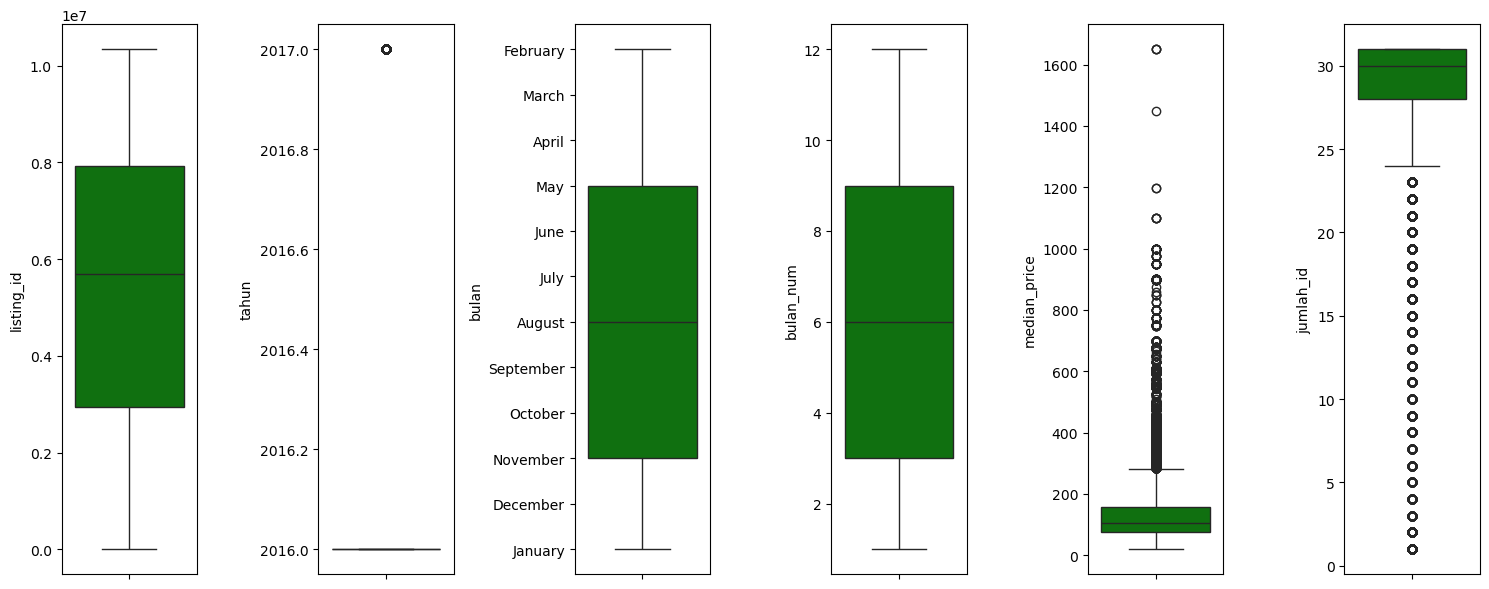

In [80]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(df1.columns):
    plt.subplot(1, len(df1.columns), i + 1)
    sns.boxplot(y=df1[col], color='green', orient = 'v')
    plt.tight_layout()

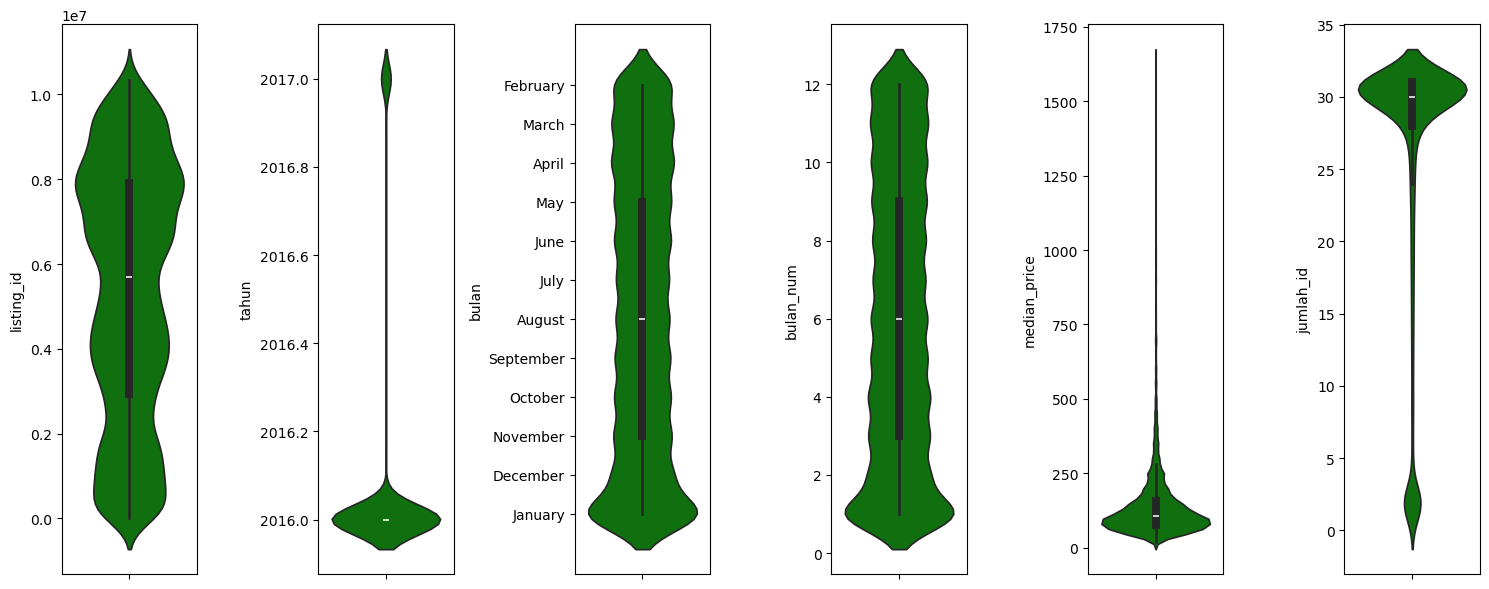

In [82]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(df1.columns):
    plt.subplot(1, len(df1.columns), i + 1)
    sns.violinplot(y=df1[col], color='green', orient='v')
    plt.tight_layout()

plt.show()

### df2

## Multivariate Analysis

### df1

### df2